# **DATA PREPROCESSING**

# *Import the Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# *Importing the Dataset*

In [2]:
data=pd.read_excel(r"D:\Crude Oil Prices Daily.xlsx")

# *Analyze the Data*

In [3]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
data.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [5]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


# *Handling Missing Data*

In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace = True)

In [10]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [11]:
data_oil=data.reset_index()['Closing Value']

In [12]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

# *Feature Scaling*

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

# *Data Visualization*

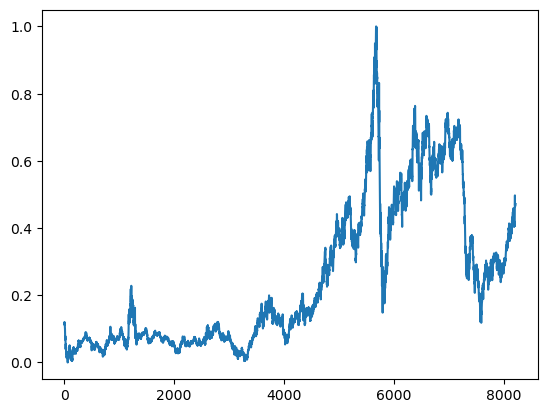

In [14]:
plt.plot(data_oil)

# *Splitting Data Into Train And Test*

In [15]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [16]:
training_size,test_size

(5340, 2876)

In [17]:
train_data.shape

(5340, 1)

# *Creating A Dataset With Sliding Windows*

In [18]:
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a) 
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
# reshape into x=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
x_train, y_train = create_dataset(train_data, time_step) 
x_test, ytest = create_dataset(test_data, time_step)

In [20]:
print (x_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [21]:
print (x_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [22]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [23]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

# MODEL BUILDING

# *Importing The Model Building Libraries*

In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential

# *Initializing The Model*

In [25]:
model = Sequential()

# *Adding LSTM Layers*

In [26]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
model.add(LSTM(50, return_sequences=True, input_shape=(10,1))) 
model.add(LSTM(50, return_sequences=True)) 
model.add(LSTM(50))

# *Adding Output Layers*

In [27]:
model.add(Dense(1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# *Configure The Learning Process*

In [29]:
model.compile(loss='mean_squared_error',optimizer='adam')

# *Train The Model*

In [30]:
model.fit(x_train,y_train, validation_data=(x_test,ytest), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
84/84 [==============================] - 8s 32ms/step - loss: 0.0021 - val_loss: 8.0729e-04
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 1.3076e-04 - val_loss: 7.9968e-04
Epoch 3/50
84/84 [==============================] - 1s 17ms/step - loss: 1.3099e-04 - val_loss: 0.0010
Epoch 4/50
84/84 [==============================] - 1s 17ms/step - loss: 1.2411e-04 - val_loss: 0.0011
Epoch 5/50
84/84 [==============================] - 2s 18ms/step - loss: 1.2408e-04 - val_loss: 8.6836e-04
Epoch 6/50
84/84 [==============================] - 2s 19ms/step - loss: 1.2195e-04 - val_loss: 0.0016
Epoch 7/50
84/84 [==============================] - 2s 18ms/step - loss: 1.2415e-04 - val_loss: 0.0015
Epoch 8/50
84/84 [==============================] - 1s 18ms/step - loss: 1.2479e-04 - val_loss: 9.2457e-04
Epoch 9/50
84/84 [==============================] - 1s 18ms/step - loss: 1.1696e-04 - val_loss: 8.7829e-04
Epoch 10/50
84/84 [==============================] - 2s 2

# *Model Evaluation*

In [31]:

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict=scaler.inverse_transform(train_predict) 
test_predict=scaler.inverse_transform(test_predict)

import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


29.312481782630265

# *Save The Model*

In [32]:
from tensorflow.keras.models import load_model

In [33]:
model.save("crude_oil.h5")

# *Test The Model*

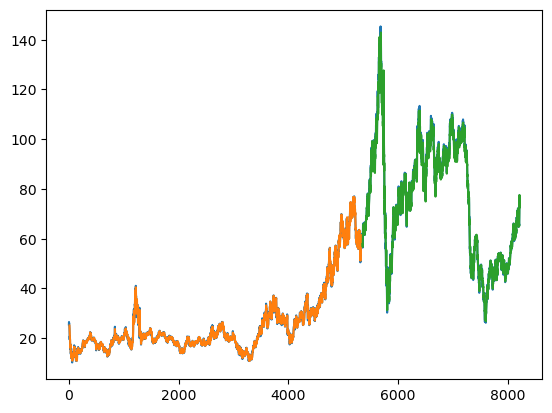

In [34]:
look_back=10
trainpredictPlot = np.empty_like(data_oil)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict

plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainpredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

2876

In [36]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [39]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:]) 
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:] #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) 
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.47145283]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47145283]
1 day output [[0.47168532]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47145283 0.47168532]
2 day output [[0.47124574]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47145283 0.47168532 0.47124574]
3 day output [[0.470152]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47145283 0.47168532 0.47124574 0.47015199]
4 day output [[0.46893212]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47145283
 0.47168532 0.47124574 0.47015199 0.46893212]
5 day output [[0.46762222]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47145283 0.47168532
 0.47124574 0.47015199 0.46893212 0.46762222]
6 day output [[0.466401]]
7 day input [0.46497853 0.47038353 0.47149415 0.47145283 0.47168532 0.

In [40]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)

In [41]:
len(data_oil)

8216

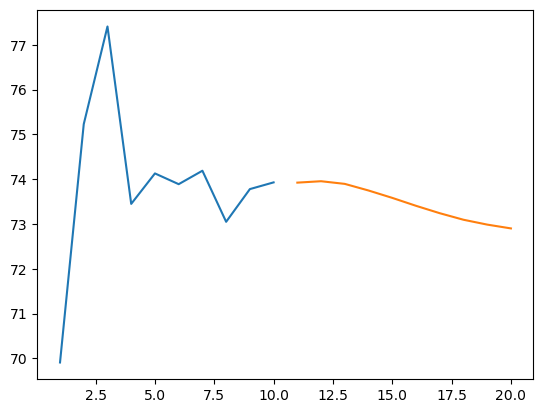

In [42]:
plt.plot(day_new, scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

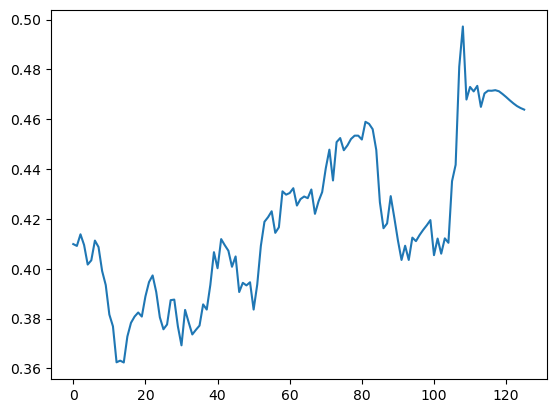

In [43]:
df3=data_oil.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

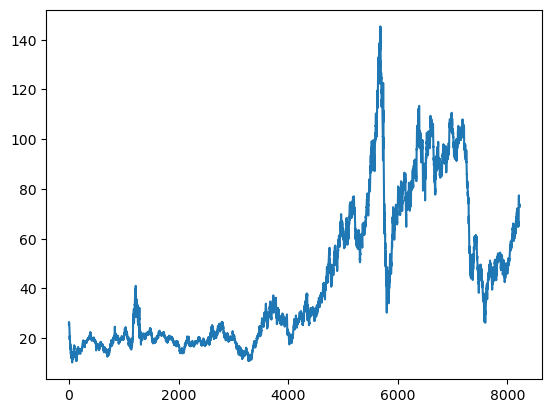

In [45]:
plt.plot(df3)